Group Project Report : Heart Disease
-

Introduction:
As of 2020, heart disease was one of the most leading factors contributing to death worldwide. The most common cause of heart disease is a buildup of fatty plaques in the arteries. Risk factors for heart disease include a poor diet, lack of exercise, obesity, and smoking. Symptoms of heart disease include rapid heart rate, chest pain, and shortness of breath. Gaining an acuurate and useful diagnosis from a doctor can be quite tedious and time consuming. A digital classifier could help speed up the process of diagnosis and decrease possible risks to health. 

The question we will be adressing is; How do x and y affect the likelyhood of posessing heart disease ? 

The data set that will be used is "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data" and it contains 14 attributes which state the quantitative variables that are of interest in regard to heart disease factors: 
- 1. age: age in years
- 2. sex: sex (1 = male; 0 = female)
- 3. cp: chest pain type 
- 4. trestbps: resting blood pressure (in mm Hg)
- 5. chol: serum cholestoral in mg/dl
- 6. fbs: (fasting blood sugar > 120 mg/dl)
- 7. restecg: resting electrocardiographic results
- 8. thalach: maximum heart rate achieved
- 9. exang: exercise induced angina
- 10. oldpeak = ST depression induced by exercise relative to rest
- 11. slope: the slope of the peak exercise ST segment
- 12. ca: number of major vessels (0-3) colored by flourosopy
- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- 14. num: diagnosis of heart disease (angiographic disease status)

Methods and Results 
-

Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
Your report should include code which:
- loads data from the original source on the web 
- wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 

note: all tables and figure should have a figure/table number and a legend

In [14]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [15]:
#First we need to load the data into r and remove and
# any empty cells. We also need to assign column names to
# the data
heart_disease <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) |>
                    rename(age =X1,
                              sex = X2,
                              cp = X3,
                              trestbps = X4,
                              chol = X5,
                              fbs = X6,
                              restecg = X7,
                              thalach = X8, 
                              exang = X9,
                              oldpeak = X10, 
                              slope = X11, 
                              ca = X12, 
                              thal = X13, 
                              num = X14) 
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [16]:
remove_qm <- function(x){
    ifelse(as.character(x) == "?", NA, x)
    }

heart_disease_clean <- map_df(heart_disease, remove_qm) %>% na.omit()

heart_disease <- heart_disease_clean |> 
    mutate(num_edited = ifelse(num == "0", "No", ifelse(num == 1 | num == 2 | num == 3 | num == 4 , "Yes", NA))) |>
                mutate(num_edited = as_factor(num_edited)) 
heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_edited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,No
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,Yes
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Yes


In [17]:
#summary of the data set 
# makes num the factor by which every predictor is being used to classify

#shows the different categories that heart disease can be classified as
heart_disease |>
    pull(num_edited) |>
    levels()

#Show the percentage of the whole data that each level of severity makes up
num_obs <- nrow(heart_disease)
heart_disease |> 
    group_by(num_edited) |> 
    summarize(
        count = n(),
        percentage = n() / num_obs * 100
        )

[1] "No"  "Yes"

num_edited,count,percentage
<fct>,<int>,<dbl>
No,160,53.87205
Yes,137,46.12795


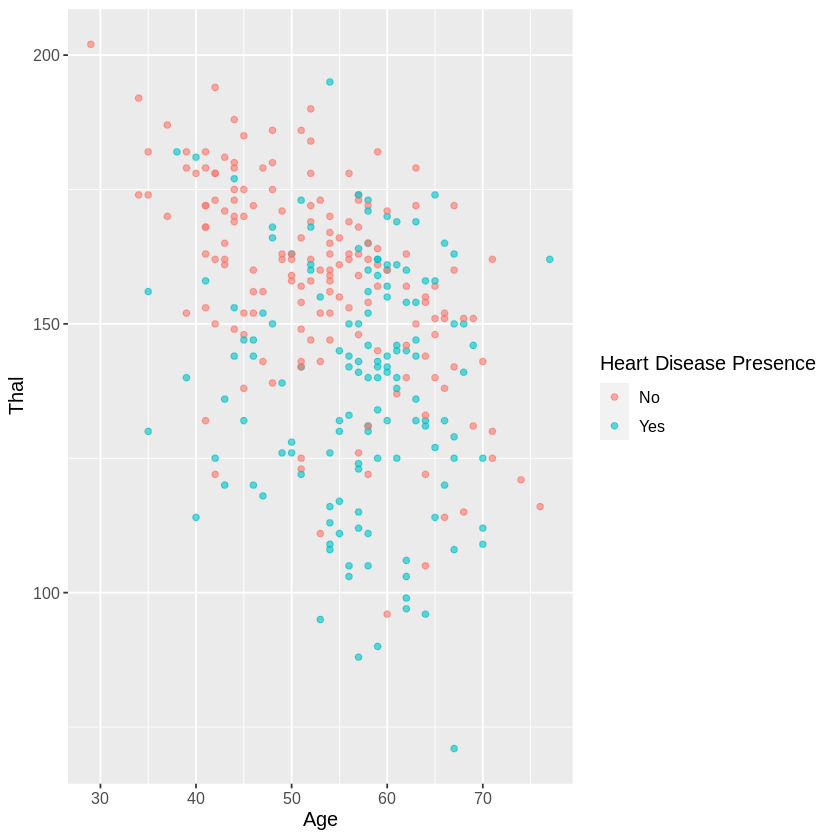

In [18]:
#visualization of the 2 predictors and where each category
# of classified data falls into
age_thal <- heart_disease |> 
    ggplot(aes(x = age, y = thalach, color = num_edited)) +
    geom_point(alpha = 0.6) +
    labs(x = "Age",
         y = "Thal",
         color = "Heart Disease Presence") +
    theme(text = element_text(size =12))
age_thal

In [32]:
#classifyer
set.seed(1)

heart_disease_split <- initial_split(heart_disease, prop = .75, strata = num_edited)
                        
heart_disease_training <- training(heart_disease_split)
                        
heart_disease_testing <- testing(heart_disease_split)

heart_disease_training

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_edited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,No
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Yes
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Yes


In [33]:
#creating a recipe 
heart_recipe<-recipe(num_edited ~ age +
                     thalach, data=heart_disease_training)|>
#standardizing the data (scaling and centring)
step_scale(all_predictors())|>
step_center(all_predictors())
heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6078788,5,0.02419113,Preprocessor1_Model01
2,accuracy,binary,0.5988889,5,0.02494428,Preprocessor1_Model02
3,accuracy,binary,0.6171717,5,0.02320761,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
23,accuracy,binary,0.729697,5,0.01585521,Preprocessor1_Model23
24,accuracy,binary,0.729697,5,0.01585521,Preprocessor1_Model24
25,accuracy,binary,0.729596,5,0.01927917,Preprocessor1_Model25


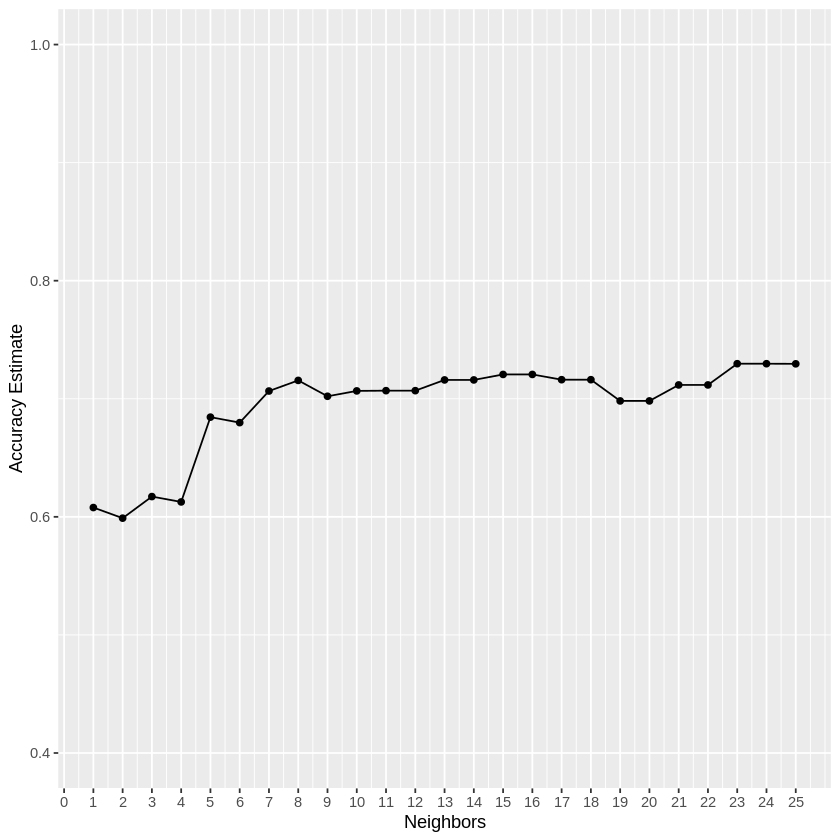

In [34]:
#??
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#??
heart_vfold <- vfold_cv(heart_disease_training, v = 5, strata = num_edited)

#creates tibble for k values
possible_k <- tibble(neighbors = seq(from = 1, to = 25))

#?
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = possible_k) |>
  collect_metrics() 
#?
accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

#graph results to find the k value that gives the best accuracy
accuracy_versus_k<-ggplot(accuracies, aes (x=neighbors, y=mean))+
geom_point()+
geom_line()+
labs(x= "Neighbors", y= "Accuracy Estimate")+
scale_x_continuous(breaks=seq(0,25, by=1))+
scale_y_continuous(limits=c(0.4, 1.0))
accuracy_versus_k

In [39]:
#we can infer that k= 16 gives us the greatest accuracy 
knn_spec2<-nearest_neighbor(weight_func="rectangular", neighbors= 10)|>
set_engine("kknn")|>
set_mode("classification")
knn_spec2

heart_fit<-workflow()|>
add_recipe(heart_recipe)|>
add_model(knn_spec2)|>
fit(data=heart_disease_training)
heart_fit

heart_predictions<-predict(heart_fit, heart_disease_testing)|>
bind_cols(heart_disease_testing)
heart_predictions

heart_metrics<-heart_predictions|>
metrics(truth= "No", esitimate=.pred_class)
heart_metrics



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 10
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2702703
Best kernel: rectangular
Best k: 10

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_edited
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
No,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,No
Yes,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,Yes
No,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yes,58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,Yes
No,44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0,Yes
Yes,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,Yes


ERROR: [1m[33mError[39m in [1m[1m`vec_as_location2_result()`:[22m
[33m![39m Can't extract columns that don't exist.
[31m✖[39m Column `No` doesn't exist.


Disscussion
-

summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

Refrences 
-
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references). (MLA Formatting)
    - “Cardiovascular Diseases (Cvds).” World Health Organization, World Health Organization, https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds). Acessed 23. Nov. 2022
    - Virani, Salim S., et al. “Heart Disease and Stroke Statistics-2021 Update.” Circulation, 27 Jan. 2021, https://www.ahajournals.org/doi/10.1161/CIR.0000000000000950. Acessed 19. Nov. 2022
- Make sure to cite the source of your data as well.
    - UCI Machine Learning Repository: Heart Disease Data Set, https://archive.ics.uci.edu/ml/datasets/Heart%20Disease. Acessed 20. Oct. 2022